# SPM Box 1 Fig 1, warming in scenario categories

Reproducing SPM Box 1 Fig 1. Note that the figure is subject to design alterations, hence the slightly different appearance to what is produced here.

## Authors

All notebooks and plots in this repository were generated by the following authors:
- Zebedee Nicholls zebedee.nicholls@climate-energy-college.org
- Malte Meinshausen malte.meinshausen@unimelb.edu.au

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

## Setup logging

This helps us see what is going on with our downloads. Note that we have to do it before importing pyam and use the root logger to avoid pyam's internal logging adjustments.

In [2]:
import logging

<IPython.core.display.Javascript object>

In [3]:
formatter = logging.Formatter(
    "%(asctime)s %(name)s %(threadName)s - %(levelname)s:  %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S",
)

stderr_error_handler = logging.StreamHandler()
stderr_error_handler.setFormatter(formatter)
stderr_error_handler.setLevel("ERROR")

stderr_debug_handler = logging.StreamHandler()
stderr_debug_handler.setFormatter(formatter)
stderr_debug_handler.setLevel("DEBUG")

root_logger = logging.getLogger()
root_logger.setLevel(logging.ERROR)
root_logger.addHandler(stderr_error_handler)

pyam_logger = logging.getLogger("pyam")
pyam_logger.setLevel(logging.DEBUG)
pyam_logger.addHandler(stderr_debug_handler)

pyam_logger.debug("Setup logging")

2022-04-27 22:34:29 pyam MainThread - DEBUG:  Setup logging


<IPython.core.display.Javascript object>

## Other imports

In [4]:
import datetime as dt
import os.path
import warnings

import numpy as np
import matplotlib.patches
import matplotlib.pyplot as plt
import pandas as pd
import pyam
import scmdata
from matplotlib.gridspec import GridSpec

import utils

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Output

In [5]:
OUT_FILE_LHS = os.path.join(
    utils.DATA_DIR, "processed", "spm-box-1-fig-1", "spm-box1-fig1-warming-data-lhs.csv"
)
OUT_FILE_RHS = OUT_FILE_LHS.replace("lhs", "rhs")
os.makedirs(os.path.dirname(OUT_FILE_LHS), exist_ok=True)

<IPython.core.display.Javascript object>

##  Download AR6 WG3 data

In [6]:
DOWNLOAD_DATA = True

cached_temperature_file = os.path.join(
    utils.DATA_DIR, "raw", "spm-box-1-fig-1", "spm-box1-fig1-warming-data.csv"
)
os.makedirs(os.path.dirname(cached_temperature_file), exist_ok=True)

<IPython.core.display.Javascript object>

In [7]:
if not os.path.exists(cached_temperature_file) or DOWNLOAD_DATA:
    conn = pyam.iiasa.Connection("ar6-public")
    db = conn.query(
        default=True,
        meta=True,
        variable=[
            "AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|5.0th Percentile",
            "AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|50.0th Percentile",
            "AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|95.0th Percentile",
            "AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|5.0th Percentile",
            "AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile",
            "AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|95.0th Percentile",
        ],
    )
    db = scmdata.ScmRun(db.timeseries().join(db.meta))
    db.to_csv(cached_temperature_file)

else:
    db = scmdata.ScmRun(cached_temperature_file)

db

2022-04-27 22:34:36 pyam.iiasa MainThread - INFO:  You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plot

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.m

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.m

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.m

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.m

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.m

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.m

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.m

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.m

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.m

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.m

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.m

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.m

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.m

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.m

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.m

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.m

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.m

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.m

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.m

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.metadata)])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg3-plots-and-processing/lib/python3.9/site-packages/pyam/iiasa.py:271: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.concat([row[META_IDX + cols], pd.Series(row.m

<ScmRun (timeseries: 10602, timepoints: 106)>
Time:
	Start: 1995-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	       CH4 emissions reductions 2019-2030 % modelled Harmonized-Infilled  \
	0                                              52.709005                   
	1                                              52.709005                   
	2                                              52.709005                   
	3                                              52.709005                   
	4                                              52.709005                   
	...                                                  ...                   
	10597                                          -9.536622                   
	10598                                          -9.536622                   
	10599                                          -9.536622                   
	10600                                          -9.536622                   
	10601                                   

<IPython.core.display.Javascript object>

In [8]:
db.meta

CH4 emissions reductions 2019-2030 % modelled Harmonized-Infilled  \
0                                              52.709005                   
1                                              52.709005                   
2                                              52.709005                   
3                                              52.709005                   
4                                              52.709005                   
...                                                  ...                   
10597                                          -9.536622                   
10598                                          -9.536622                   
10599                                          -9.536622                   
10600                                          -9.536622                   
10601                                          -9.536622                   

       CH4 emissions reductions 2019-2040 % modelled Harmonized-Infilled  \
0                                              65.474187                   
1                                              65.474187                   
2                                              65.474187                   
3                                              65.474187                   
4                                              65.474187                   
...                                                  ...                   
10597                                         -14.594274                   
10598                                         -14.594274                   
10599                                         -14.594274                   
10600                                         -14.594274                   
10601                                         -14.594274                   

       CH4 emissions reductions 2019-2050 % modelled Harmonized-Infilled  \
0                                              72.501185                   
1                                              72.501185                   
2                                              72.501185                   
3                                              72.501185                   
4                                              72.501185                   
...                                                  ...                   
10597                                         -16.273735                   
10598                                         -16.273735                   
10599                                         -16.273735                   
10600                                         -16.273735                   
10601                                         -16.273735                   

       CO2 emissions 2030 Gt CO2/yr  CO2 emissions 2050 Gt CO2/yr  \
0                         21.076127                     -0.413244   
1                         21.076127                     -0.413244   
2                         21.076127                     -0.413244   
3                         21.076127                     -0.413244   
4                         21.076127                     -0.413244   
...                             ...                           ...   
10597                     52.444219                     66.161484   
10598                     52.444219                     66.161484   
10599                     52.444219                     66.161484   
10600                     52.444219                     66.161484   
10601                     52.444219                     66.161484   

       CO2 emissions 2100 Gt CO2/yr  \
0                         -8.611382   
1                         -8.611382   
2                         -8.611382   
3                         -8.611382   
4                         -8.611382   
...                             ...   
10597                     80.467957   
10598                     80.467957   
10599                     80.467957   
10600                     80.467957   
10601     

<IPython.core.display.Javascript object>

In [9]:
# Note: there are scenarios that have a subset category but not a category
(~db.meta[["Category", "Category_subset"]].isnull()).sum()

Category           10209
Category_subset    10209
dtype: int64

<IPython.core.display.Javascript object>

## Rename sub-categories

In [10]:
subset_map = {
    "C1a_NZGHGs": "C1a",
    "C1b_+veGHGs": "C1b",
    "C2": "C2",
    "C3": "C3",
    "C3a_Immediate_Action": "C3a",
    "C3b_NDCs": "C3b",
    "C4": "C4",
    "C5": "C5",
    "C6": "C6",
    "C7": "C7",
    "C8": "C8",
}

db["Category_subset"] = db["Category_subset"].map(subset_map)
db.meta[["model", "scenario", "Category", "Category_subset"]].drop_duplicates()

model                scenario        Category  \
0            AIM/CGE 2.0  ADVANCE_2020_1.5C-2100  failed-vetting   
6            AIM/CGE 2.0      ADVANCE_2020_Med2C  failed-vetting   
12           AIM/CGE 2.0       ADVANCE_2020_WB2C  failed-vetting   
18           AIM/CGE 2.0      ADVANCE_2030_Med2C  failed-vetting   
24           AIM/CGE 2.0  ADVANCE_2030_Price1.5C  failed-vetting   
...                  ...                     ...             ...   
10572  WITCH-GLOBIOM 4.4            CD-LINKS_NPi              C7   
10578  WITCH-GLOBIOM 4.4   CD-LINKS_NPi2020_1000              C1   
10584  WITCH-GLOBIOM 4.4   CD-LINKS_NPi2020_1600              C3   
10590  WITCH-GLOBIOM 4.4    CD-LINKS_NPi2020_400              C1   
10596  WITCH-GLOBIOM 4.4       CD-LINKS_NoPolicy              C7   

      Category_subset  
0                 C1a  
6                  C4  
12                C1b  
18                 C4  
24                 C2  
...               ...  
10572              C7  
10578             C1a  
10584             C3a  
10590             C1a  
10596              C7  

[1833 rows x 4 columns]

<IPython.core.display.Javascript object>

##  Load WG1 data

Used for the SSPs. We also extrapolate 2099 to get a 2100 data point using linear extrapolation.

In [11]:
ar6_ts = scmdata.ScmRun(
    "https://raw.githubusercontent.com/openscm/AR6-WG1-Data-Compilation/main/data/processed/fig-spm8/fig-spm8-timeseries.csv"
)
ar6_ts = ar6_ts.interpolate([dt.datetime(y, 1, 1) for y in range(1950, 2100 + 1)])
ar6_ts.head()

time                                                                                                                            1950-01-01  \
model         reference_period_end_year reference_period_start_year region scenario   unit variable                                          
Ch.4 Assessed 1900.0                    1850.0                      World  SSP2-4.5   K    Surface Air Temperature Change|5%     -0.207988   
                                                                                           Surface Air Temperature Change|95%    -1.041109   
                                                                                           Surface Air Temperature Change|Mean   -0.436522   
                                                                           historical K    Surface Air Temperature Change|5%     -0.060030   
                                                                                           Surface Air Temperature Change|95%     0.608546   

time                                                                                                                            1951-01-01  \
model         reference_period_end_year reference_period_start_year region scenario   unit variable                                          
Ch.4 Assessed 1900.0                    1850.0                      World  SSP2-4.5   K    Surface Air Temperature Change|5%     -0.189244   
                                                                                           Surface Air Temperature Change|95%    -1.006734   
                                                                                           Surface Air Temperature Change|Mean   -0.412849   
                                                                           historical K    Surface Air Temperature Change|5%     -0.055686   
                                                                                           Surface Air Temperature Change|95%     0.525308   

time                                                                                                                            1952-01-01  \
model         reference_period_end_year reference_period_start_year region scenario   unit variable                                          
Ch.4 Assessed 1900.0                    1850.0                      World  SSP2-4.5   K    Surface Air Temperature Change|5%     -0.170501   
                                                                                           Surface Air Temperature Change|95%    -0.972359   
                                                                                           Surface Air Temperature Change|Mean   -0.389177   
                                                                           historical K    Surface Air Temperature Change|5%     -0.042891   
                                                                                           Surface Air Temperature Change|95%     0.540725   

time                                                                                                                            1953-01-01  \
model         reference_period_end_year reference_period_start_year region scenario   unit variable                                          
Ch.4 Assessed 1900.0                    1850.0                      World  SSP2-4.5   K    Surface Air Temperature Change|5%     -0.151707   
                                                                                           Surface Air Temperature Change|95%    -0.937889   
                                                                                           Surface Air Temperature Change|Mean   -0.365439   
                                                                           historical K    Surface Air Temperature Change|5%     -0.020530   
                                                                                           Surface Air Temperature Change|95%     0.535419   

time                

<IPython.core.display.Javascript object>

## Plot building

Warning: this is a surprisingly large amount of mucking around.

In [12]:
db_vetted = db.filter(
    Category=["", "failed-vetting", "no-climate-assessment"], keep=False
)
assert (
    db_vetted.meta[["model", "scenario"]].drop_duplicates().shape[0] == 1202
), "Wrong number of vetted scenarios!"
db_vetted

<ScmRun (timeseries: 7212, timepoints: 106)>
Time:
	Start: 1995-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	       CH4 emissions reductions 2019-2030 % modelled Harmonized-Infilled  \
	366                                            40.273245                   
	367                                            40.273245                   
	368                                            40.273245                   
	369                                            40.273245                   
	370                                            40.273245                   
	...                                                  ...                   
	10597                                          -9.536622                   
	10598                                          -9.536622                   
	10599                                          -9.536622                   
	10600                                          -9.536622                   
	10601                                    

<IPython.core.display.Javascript object>

### Count categories

Used for validation later

In [13]:
ar6_vetted_category_counts = (
    db_vetted.meta[["model", "scenario", "Category"]]
    .drop_duplicates()["Category"]
    .value_counts()
    .sort_index()
)
ar6_vetted_category_counts

C1     97
C2    133
C3    311
C4    159
C5    212
C6     97
C7    164
C8     29
Name: Category, dtype: int64

<IPython.core.display.Javascript object>

In [14]:
ar6_vetted_sub_category_counts = (
    db_vetted.meta[["model", "scenario", "Category_subset"]]
    .drop_duplicates()["Category_subset"]
    .value_counts()
    .sort_index()
)
ar6_vetted_sub_category_counts

C1a     50
C1b     47
C2     133
C3      10
C3a    204
C3b     97
C4     159
C5     212
C6      97
C7     164
C8      29
Name: Category_subset, dtype: int64

<IPython.core.display.Javascript object>

###  Palettes and styles for plotting

In [15]:
# thanks https://stackoverflow.com/questions/37765197/darken-or-lighten-a-color-in-matplotlib
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys

    assert 0 <= amount
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))

    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


def saturate(color):
    """
    Turn saturation to 1
    """
    import matplotlib.colors as mc
    import colorsys

    try:
        c = mc.cnames[color]
    except:
        c = color

    c = colorsys.rgb_to_hsv(*mc.to_rgb(c))

    return colorsys.hsv_to_rgb(c[0], 1, c[2])

<IPython.core.display.Javascript object>

In [16]:
palette = {
    "C1a": (151, 206, 228),
    "C1b": (0, 206, 228),
    "C1": (151, 206, 228),
    "C2": (119, 134, 99),
    "C3": (111, 120, 153),
    "C4": (167, 198, 130),
    "C5": (140, 167, 208),
    "C6": (250, 193, 130),
    "C7": (241, 136, 114),
    "C8": (189, 113, 97),
}
palette = {k: np.array(v) / 255 for k, v in palette.items()}
palette = {k: saturate(v) for k, v in palette.items()}
palette["C1a"] = lighten_color(palette["C1"], amount=0.5)
palette["C1b"] = lighten_color(palette["C1"], amount=0.7)
palette["C3a"] = lighten_color(palette["C3"], amount=0.5)
palette["C3b"] = lighten_color(palette["C3"], amount=0.7)
palette

{'C1a': (0.44705882352941173, 0.8420168067226892, 1.0),
 'C1b': (0.22588235294117653, 0.7788235294117647, 0.9999999999999999),
 'C1': (0.0, 0.6386554621848741, 0.8941176470588236),
 'C2': (0.3002801120448178, 0.5254901960784314, 0.0),
 'C3': (0.0, 0.12857142857142864, 0.6),
 'C4': (0.4224913494809687, 0.7764705882352941, 0.0),
 'C5': (0.0, 0.32387543252595113, 0.8156862745098039),
 'C6': (0.9803921568627451, 0.5147058823529411, 0.0),
 'C7': (0.9450980392156862, 0.16371777057279596, 0.0),
 'C8': (0.7411764705882353, 0.1289002557544757, 0.0),
 'C3a': (0.30000000000000016, 0.45000000000000007, 0.9999999999999999),
 'C3b': (0.020000000000000018, 0.22999999999999993, 1.0)}

<IPython.core.display.Javascript object>

In [17]:
palette_imps = {
    "LD": palette["C1"],
    "Red": palette["C1"],
    "SP": palette["C1"],
    "Ren": palette["C1"],
    "Neg": palette["C2"],
    "GS": palette["C3"],
    "ModAct": palette["C6"],
    "CurPol": palette["C7"],
}

style_imps = {
    "SP": {"linestyle": "-", "marker": "s"},
    "LD": {"linestyle": "-", "marker": "s"},
    "Ren": {"linestyle": "-", "marker": "s"},
    "Neg": {"linestyle": "-", "marker": "s"},
    "GS": {"linestyle": "-", "marker": "s"},
    "ModAct": {"linestyle": "-", "marker": "s"},
    "CurPol": {"linestyle": "-", "marker": "s"},
}
style_imps = {k: {**v, "colour": palette_imps[k]} for k, v in style_imps.items()}
style_imps

{'SP': {'linestyle': '-',
  'marker': 's',
  'colour': (0.0, 0.6386554621848741, 0.8941176470588236)},
 'LD': {'linestyle': '-',
  'marker': 's',
  'colour': (0.0, 0.6386554621848741, 0.8941176470588236)},
 'Ren': {'linestyle': '-',
  'marker': 's',
  'colour': (0.0, 0.6386554621848741, 0.8941176470588236)},
 'Neg': {'linestyle': '-',
  'marker': 's',
  'colour': (0.3002801120448178, 0.5254901960784314, 0.0)},
 'GS': {'linestyle': '-',
  'marker': 's',
  'colour': (0.0, 0.12857142857142864, 0.6)},
 'ModAct': {'linestyle': '-',
  'marker': 's',
  'colour': (0.9803921568627451, 0.5147058823529411, 0.0)},
 'CurPol': {'linestyle': '-',
  'marker': 's',
  'colour': (0.9450980392156862, 0.16371777057279596, 0.0)}}

<IPython.core.display.Javascript object>

In [18]:
palette_ssps = {
    "SSP1-1.9": palette["C1"],
    "SSP1-2.6": palette["C3"],
    "SSP2-4.5": palette["C6"],
    "SSP3-7.0": palette["C7"],
    "SSP5-8.5": palette["C8"],
}

style_ssps = {
    "SSP1-1.9": {"linestyle": "--", "marker": "o"},
    "SSP1-2.6": {"linestyle": "--", "marker": "o"},
    "SSP2-4.5": {"linestyle": "--", "marker": "o"},
    "SSP3-7.0": {"linestyle": "--", "marker": "o"},
    "SSP5-8.5": {"linestyle": "--", "marker": "o"},
}
style_ssps = {k: {**v, "colour": palette_ssps[k]} for k, v in style_ssps.items()}
style_ssps

{'SSP1-1.9': {'linestyle': '--',
  'marker': 'o',
  'colour': (0.0, 0.6386554621848741, 0.8941176470588236)},
 'SSP1-2.6': {'linestyle': '--',
  'marker': 'o',
  'colour': (0.0, 0.12857142857142864, 0.6)},
 'SSP2-4.5': {'linestyle': '--',
  'marker': 'o',
  'colour': (0.9803921568627451, 0.5147058823529411, 0.0)},
 'SSP3-7.0': {'linestyle': '--',
  'marker': 'o',
  'colour': (0.9450980392156862, 0.16371777057279596, 0.0)},
 'SSP5-8.5': {'linestyle': '--',
  'marker': 'o',
  'colour': (0.7411764705882353, 0.1289002557544757, 0.0)}}

<IPython.core.display.Javascript object>

###  Plot setup

In [19]:
plt.rcParams["figure.figsize"] = (14, 8)
plt.rcParams["pdf.use14corefonts"] = True
plt.rcParams["text.usetex"] = False
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.size"] = 16
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["legend.fontsize"] = 10
plt.rcParams["axes.xmargin"] = 0

<IPython.core.display.Javascript object>

### Config

In [20]:
def ensure_dont_plot_twice(inp):
    # don't plot twice
    tmp = inp["Category_show_rhs_only"].copy()
    tmp[tmp.isin(inp["Category_show_lhs"])] = "drop"
    inp["Category_show_rhs_only"] = tmp

    return inp


table_spm1_comparisons = {
    "C1": {"peak": (1.6, 1.4, 1.6), 2100: (1.3, 1.1, 1.5)},
    "C1a": {"peak": (1.6, 1.4, 1.6), 2100: (1.2, 1.1, 1.4)},
    "C1b": {"peak": (1.6, 1.5, 1.6), 2100: (1.4, 1.3, 1.5)},
    "C2": {"peak": (1.7, 1.5, 1.8), 2100: (1.4, 1.2, 1.5)},
    "C3": {"peak": (1.7, 1.6, 1.8), 2100: (1.6, 1.5, 1.8)},
    "C3a": {"peak": (1.7, 1.6, 1.8), 2100: (1.6, 1.5, 1.8)},
    "C3b": {"peak": (1.8, 1.6, 1.8), 2100: (1.6, 1.5, 1.7)},
    "C4": {"peak": (1.9, 1.7, 2.0), 2100: (1.8, 1.5, 2.0)},
    "C5": {"peak": (2.2, 1.9, 2.5), 2100: (2.1, 1.9, 2.5)},
    "C6": {"peak": (2.7, 2.4, 2.9), 2100: (2.7, 2.4, 2.9)},
    "C7": {"peak": (3.5, 2.8, 3.9), 2100: (3.5, 2.8, 3.9)},
    "C8": {"peak": (4.2, 3.7, 5.0), 2100: (4.2, 3.7, 5.0)},
}

<IPython.core.display.Javascript object>

In [21]:
CATEGORISATION_CONFIG = "Category_lhs_Category_rhs"
# CATEGORISATION_CONFIG = "Category_lhs_Category_subset_rhs"


def add_category_show(inp):
    inp["Category_show_lhs"] = inp["Category"]
    inp["Category_show_rhs_only"] = inp["Category"]
    inp = ensure_dont_plot_twice(inp)

    return inp


if CATEGORISATION_CONFIG == "Category_lhs_Category_rhs":
    CHECK_AGAINST_TABLE = True

    def add_category_show(inp):
        inp["Category_show_lhs"] = inp["Category"]
        inp["Category_show_rhs_only"] = inp["Category"]
        inp = ensure_dont_plot_twice(inp)

        return inp

    compare_category_counts_lhs = ar6_vetted_category_counts
    compare_category_counts_rhs = ar6_vetted_category_counts

    bar_order = [
        "C1",
        "SP",
        "LD",
        "Ren",
        "SSP1-1.9",
        "C2",
        "Neg",
        "C3",
        "GS",
        "SSP1-2.6",
        "C4",
        "C5",
        "C6",
        "ModAct",
        "SSP2-4.5",
        "C7",
        "CurPol",
        "SSP3-7.0",
        "C8",
        "SSP5-8.5",
    ]


elif CATEGORISATION_CONFIG == "Category_lhs_Category_subset_rhs":
    CHECK_AGAINST_TABLE = True

    def add_category_show(inp):
        inp["Category_show_lhs"] = inp["Category"]
        inp["Category_show_rhs_only"] = inp["Category_subset"]
        inp = ensure_dont_plot_twice(inp)

        return inp

    compare_category_counts_lhs = ar6_vetted_category_counts
    compare_category_counts_rhs = ar6_vetted_sub_category_counts

    bar_order = [
        "C1",
        "C1a",
        "C1b",
        "SP",
        "LD",
        "Ren",
        "SSP1-1.9",
        "C2",
        "Neg",
        "C3",
        "C3a",
        "C3b",
        "GS",
        "SSP1-2.6",
        "C4",
        "C5",
        "C6",
        "ModAct",
        "SSP2-4.5",
        "C7",
        "CurPol",
        "SSP3-7.0",
        "C8",
        "SSP5-8.5",
    ]


else:
    raise NotImplementedError(CATEGORISATION_CONFIG)

<IPython.core.display.Javascript object>

###  General config

In [22]:
years_to_plot = range(2015, 2100 + 1)

bar_metas_hatches = [
    ("Median peak warming (MAGICCv7.5.3)", None),
    ("Median warming in 2100 (MAGICCv7.5.3)", "empty"),
]

<IPython.core.display.Javascript object>

###  Helper functions

In [23]:
def get_fig_axes():
    fig = plt.figure(constrained_layout=True)
    gs = GridSpec(1, 10, figure=fig)

    ax0 = fig.add_subplot(gs[0, :6])
    ax1 = fig.add_subplot(gs[0, 6:], sharey=ax0)

    return fig, ax0, ax1

<IPython.core.display.Javascript object>

In [24]:
def get_pdf_meta_pdf(climate_timeseries, years=years_to_plot):
    pdf = add_category_show(climate_timeseries.filter(Category=["*"], year=years))

    meta_pdf = pdf.meta.drop(["variable", "unit"], axis="columns").drop_duplicates()
    meta_pdf = add_category_show(meta_pdf).set_index(["model", "scenario"])

    pdf["model-scenario"] = pdf["model"] + " - " + pdf["scenario"]
    pdf["model"] = "model"
    pdf["scenario"] = "scenario"

    return pdf, meta_pdf

<IPython.core.display.Javascript object>

In [25]:
def get_quantile_df(inp):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        quantiles_over = list(
            set(inp.meta_attributes)
            - set(
                # columns we don't want to drop when calculating quantiles
                [
                    "Category_show_lhs",
                    "model",
                    "region",
                    "scenario",
                    "unit",
                    "variable",
                ]
            )
        )

        medians = scmdata.ScmRun(
            inp.filter(
                variable="AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile"
            ).quantiles_over(
                quantiles_over,
                [0.5],
            )
        )
        medians["variable"] = "Surface Temperature (GSAT)|MAGICC median"

        magicc_fair_separate = scmdata.ScmRun(
            inp.filter(
                variable="AR6 climate diagnostics|Surface Temperature (GSAT)|*|50.0th Percentile"
            ).quantiles_over(
                quantiles_over,
                [0.05, 0.95],
            )
        )

        p05 = (
            magicc_fair_separate.filter(quantile=0.05)
            .drop_meta("quantile")
            .quantiles_over("variable", [0])
        )
        p05[
            "variable"
        ] = "Surface Temperature (GSAT)|Lower of MAGICC and FaIR 5th percentile"
        p05 = scmdata.ScmRun(p05)
        p05["quantile"] = 0.05

        p95 = (
            magicc_fair_separate.filter(quantile=0.95)
            .drop_meta("quantile")
            .quantiles_over("variable", [1])
        )
        p95[
            "variable"
        ] = "Surface Temperature (GSAT)|Higher of MAGICC and FaIR 95th percentile"
        p95 = scmdata.ScmRun(p95)
        p95["quantile"] = 0.95

    pdfq = scmdata.run_append([medians, p05, p95])

    return pdfq

<IPython.core.display.Javascript object>

In [26]:
def plot_funnels(inp, ax0, hue_var="Category_show_lhs"):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        pdf = inp.copy()
        ax0, lh = pdf.plumeplot(
            #         quantiles_plumes=[((0.05, 0.95), 0.5),],  # no median
            quantiles_plumes=[((0.05, 0.95), 0.1), ((0.5,), 1.0)],  # median
            #             quantiles_plumes=[(((0.5,), 1.0))],  # median only
            hue_var=hue_var,
            hue_label="Category",
            style_var="unit",
            style_label="Unit",
            palette=palette,
            ax=ax0,
            pre_calculated=True,
            time_axis="year",
            linewidth=3,
        )

    for pdfhv in pdf.groupby(hue_var):
        name = pdfhv.get_unique_meta(hue_var, True)

        eoc = pdfhv.filter(year=2100)
        median = eoc.filter(quantile=0.5).values.squeeze()
        lower = eoc.filter(quantile=0.05).values.squeeze()
        upper = eoc.filter(quantile=0.95).values.squeeze()

        np.testing.assert_allclose(
            np.round([median, lower, upper], 1), table_spm1_comparisons[name][2100]
        )

    return ax0

<IPython.core.display.Javascript object>

In [27]:
def get_central_point(name, bar_order):
    return bar_order.index(name)


def get_x_lower(name, i, bar_order, bar_metas_hatches):
    shift_from_left = i / len(bar_metas_hatches)
    return get_central_point(name, bar_order) + shift_from_left


def get_x_upper(name, i, bar_order, bar_metas_hatches):
    shift_from_left = (i + 1) / len(bar_metas_hatches)
    return get_central_point(name, bar_order) + shift_from_left

<IPython.core.display.Javascript object>

In [28]:
def plot_scatter(ax, x, y, marker, colour, hatch):
    if hatch is None:
        facecolor = colour
    else:
        facecolor = "none"

    ax.scatter(
        x,
        y,
        marker=marker,
        color=colour,
        facecolors=facecolor,
        alpha=0.9,
    )

<IPython.core.display.Javascript object>

In [29]:
def create_summary_dict_for_scatter(name, time_period, x, y, description):
    return {
        "name": name,
        "x": x,
        "y": y,
        "time_period": time_period,
        "description": description,
    }

<IPython.core.display.Javascript object>

In [30]:
def add_wg1_ssps(ax0, ax1, years, bar_config, bar_order, lhs_lines=True):
    out = []
    for ssp in style_ssps:
        ssp_ts = ar6_ts.filter(
            scenario=ssp, variable="Surface Air Temperature Change|Mean", year=years
        )

        colour = style_ssps[ssp]["colour"]

        if lhs_lines:
            ax0 = ssp_ts.lineplot(
                ax=ax0,
                time_axis="year",
                linewidth=3,
                color=colour,
                linestyle=style_ssps[ssp]["linestyle"],
                hue=None,
            )

        for i, (meta_column, hatch) in enumerate(bar_config):
            if "peak" in meta_column:
                value = ssp_ts.timeseries().max(axis=1).values.squeeze()
                time_period = "peak"
            else:
                value = ssp_ts.filter(year=2100).values.squeeze()
                time_period = 2100

            x_lower = get_x_lower(ssp, i, bar_order, bar_config)
            x_upper = get_x_upper(ssp, i, bar_order, bar_config)

            x_loc = (x_lower + x_upper) / 2
            plot_scatter(
                ax1,
                x_loc,
                value,
                marker=style_ssps[ssp]["marker"],
                colour=colour,
                hatch=hatch,
            )

            tmp = create_summary_dict_for_scatter(
                ssp,
                time_period,
                x_loc,
                value,
                "Location of marker",
            )

            out.append(tmp)

    out = pd.DataFrame(out)

    return out

<IPython.core.display.Javascript object>

In [31]:
def plot_bar_bit(in_meta, name, style_dict, ax, bar_config, bar_order):
    out = []
    for i, (bm, hatch) in enumerate(bar_metas_hatches):
        value = float(in_meta[bm])
        if "peak" in bm:
            time_period = "peak"
        else:
            time_period = 2100

        x_lower = get_x_lower(name, i, bar_order, bar_config)
        x_upper = get_x_upper(name, i, bar_order, bar_config)
        x_loc = (x_lower + x_upper) / 2
        plot_scatter(
            ax,
            x_loc,
            value,
            marker=style_dict[name]["marker"],
            colour=style_dict[name]["colour"],
            hatch=hatch,
        )

        tmp = create_summary_dict_for_scatter(
            name,
            time_period,
            x_loc,
            value,
            "Location of marker",
        )

        out.append(tmp)

    return pd.DataFrame(out)


def add_lines_scatter_database_output(
    inp,
    filter_col,
    style_dict,
    years,
    ax_bar,
    bar_metas_hatches,
    bar_order,
    lhs_lines=True,
    ax_line=None,
):
    out = []
    for name in style_dict:
        name_ts = inp.filter(
            **{filter_col: name},
            year=years,
            variable="AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile"
        )

        name_meta = meta_pdf.loc[
            (
                name_ts.get_unique_meta("model-scenario", True).split(" -")[0].strip(),
                name_ts.get_unique_meta("model-scenario", True).split("- ")[-1].strip(),
            ),
            :,
        ]

        if lhs_lines:
            plot_median_line(name_ts, style_dict, name, ax_line)

        tmp = plot_bar_bit(
            name_meta, name, style_dict, ax_bar, bar_metas_hatches, bar_order
        )
        out.append(tmp)

    return pd.concat(out)

<IPython.core.display.Javascript object>

In [32]:
def convert_imp_name(n):
    return f"IMP-{n}" if n in palette_imps and n not in ["CurPol", "ModAct"] else n

<IPython.core.display.Javascript object>

### Plot

In [33]:
full_palette = {
    **palette,
    **palette_imps,
    **palette_ssps,
}

<IPython.core.display.Javascript object>

In [34]:
def add_bar(ax, x_lower, x_upper, y_lower, y_upper, hatch, colour, edgecolor, alpha=1):
    if hatch is None:
        facecolor = colour
    elif hatch == "empty":
        facecolor = "none"
    else:
        facecolor = "none"

    ax.add_patch(
        matplotlib.patches.Rectangle(
            (x_lower, y_lower),
            x_upper - x_lower,
            y_upper - y_lower,
            facecolor=facecolor,
            edgecolor=edgecolor,
            alpha=alpha,
        ),
    )


def add_category_ranges(
    full_palette,
    pdf_in,
    meta_pdf_in,
    hue_var,
    bar_order,
    bar_config,
    ax,
    check_against_spm1,
    spm1_comparisons,
    plot_peak_climate_uncertainty=False,
    compare_category_counts=None,
):
    pdf_in = pdf_in.filter(**{hue_var: "drop"}, keep=False)
    meta_pdf_in = meta_pdf[~meta_pdf[hue_var].isin(["drop"])]

    out = []
    for name, meta_pdf_in_c in meta_pdf_in.groupby(hue_var):
        for i, (meta_col, hatch) in enumerate(bar_config):
            median = meta_pdf_in_c[meta_col].astype(float).quantile((0.5))

            if "peak" in meta_col:
                time_period = "peak"
            else:
                time_period = 2100

            x_lower = get_x_lower(name, i, bar_order, bar_config)
            x_upper = get_x_upper(name, i, bar_order, bar_config)

            x_central = (x_upper + x_lower) / 2

            add_bar(
                ax,
                x_lower,
                x_upper,
                median,
                median + 0.03,
                hatch=None,
                colour=full_palette[name],
                edgecolor=full_palette[name],
            )

            magicc_upper = meta_pdf_in_c[meta_col].astype(float).quantile(0.95)
            fair_upper = (
                meta_pdf_in_c[meta_col.replace("MAGICCv7.5.3", "FaIRv1.6.2")]
                .astype(float)
                .quantile(0.95)
            )
            magicc_lower = meta_pdf_in_c[meta_col].astype(float).quantile(0.05)
            fair_lower = (
                meta_pdf_in_c[meta_col.replace("MAGICCv7.5.3", "FaIRv1.6.2")]
                .astype(float)
                .quantile(0.05)
            )

            upper = max(magicc_upper, fair_upper)
            lower = min(magicc_lower, fair_lower)

            if check_against_spm1:
                if "peak" in meta_col:
                    compare_vals = spm1_comparisons[name]["peak"]
                else:
                    compare_vals = spm1_comparisons[name][2100]
                #                 print(name)
                #                 print(compare_vals)
                np.testing.assert_allclose(
                    [np.round(median, 1), np.round(lower, 1), np.round(upper, 1)],
                    compare_vals,
                )

            add_bar(
                ax,
                x_lower,
                x_upper,
                lower,
                upper,
                hatch=hatch,
                colour=full_palette[name],
                edgecolor=full_palette[name],
                alpha=0.7,
            )

            for y, description in (
                (median, "Median line"),
                (lower, "Lower of 'box' (range over scenarios)"),
                (upper, "Upper of 'box' (range over scenarios)"),
            ):
                out.append(
                    create_summary_dict_for_scatter(
                        name,
                        time_period,
                        x_central,
                        y,
                        description,
                    )
                )

            tmp = pdf.filter(
                **{hue_var: name},
            )

            def get_v_q(inp, v, q):
                tss = inp.filter(variable=v).timeseries()
                assert (
                    tss.shape[0] == compare_category_counts[name]
                ), f"{tss.shape[0]}, {compare_category_counts[name]}, {name}"

                return tss.quantile(q=q, axis=0).values.squeeze()

            if "2100" in meta_col:
                tmp = tmp.filter(
                    year=2100,
                )

                lower_clim_unc_magicc = get_v_q(
                    tmp,
                    v="AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|5.0th Percentile",
                    q=0.05,
                )
                lower_clim_unc_fair = get_v_q(
                    tmp,
                    v="AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|5.0th Percentile",
                    q=0.05,
                )

                upper_clim_unc_magicc = get_v_q(
                    tmp,
                    v="AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|95.0th Percentile",
                    q=0.95,
                )
                upper_clim_unc_fair = get_v_q(
                    tmp,
                    v="AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|95.0th Percentile",
                    q=0.95,
                )

            else:
                if not plot_peak_climate_uncertainty:
                    continue

                tmp_meta = tmp.meta[
                    [
                        "model",
                        "scenario",
                        "model-scenario",
                        "p5 peak warming (MAGICCv7.5.3)",
                        "p95 peak warming (MAGICCv7.5.3)",
                        "p5 peak warming (FaIRv1.6.2)",
                        "p95 peak warming (FaIRv1.6.2)",
                    ]
                ].drop_duplicates()

                assert tmp_meta.shape[0] == compare_category_counts[name]

                lower_clim_unc_magicc = tmp_meta[
                    "p5 peak warming (MAGICCv7.5.3)"
                ].quantile(q=0.05)
                lower_clim_unc_fair = tmp_meta["p5 peak warming (FaIRv1.6.2)"].quantile(
                    q=0.05
                )

                upper_clim_unc_magicc = tmp_meta[
                    "p95 peak warming (MAGICCv7.5.3)"
                ].quantile(q=0.95)
                upper_clim_unc_fair = tmp_meta[
                    "p95 peak warming (FaIRv1.6.2)"
                ].quantile(q=0.95)

            upper_clim_unc = max(upper_clim_unc_magicc, upper_clim_unc_fair)
            lower_clim_unc = min(lower_clim_unc_magicc, lower_clim_unc_fair)

            for y, description in (
                (
                    lower_clim_unc,
                    "Lower of 'line' (indicative climate plus scenario uncertainty)",
                ),
                (
                    upper_clim_unc,
                    "Upper of 'line' (indicative climate plus scenario uncertainty)",
                ),
            ):
                out.append(
                    create_summary_dict_for_scatter(
                        name,
                        time_period,
                        x_central,
                        y,
                        description,
                    )
                )

            for y_lower, y_upper in [
                (lower_clim_unc, lower),
                (upper, upper_clim_unc),
            ]:
                add_bar(
                    ax1,
                    x_central - 0.05,
                    x_central + 0.05,
                    y_lower,
                    y_upper,
                    hatch=None,
                    colour=full_palette[name],
                    edgecolor="none",
                    alpha=0.5,
                )

    return pd.DataFrame(out)

<IPython.core.display.Javascript object>

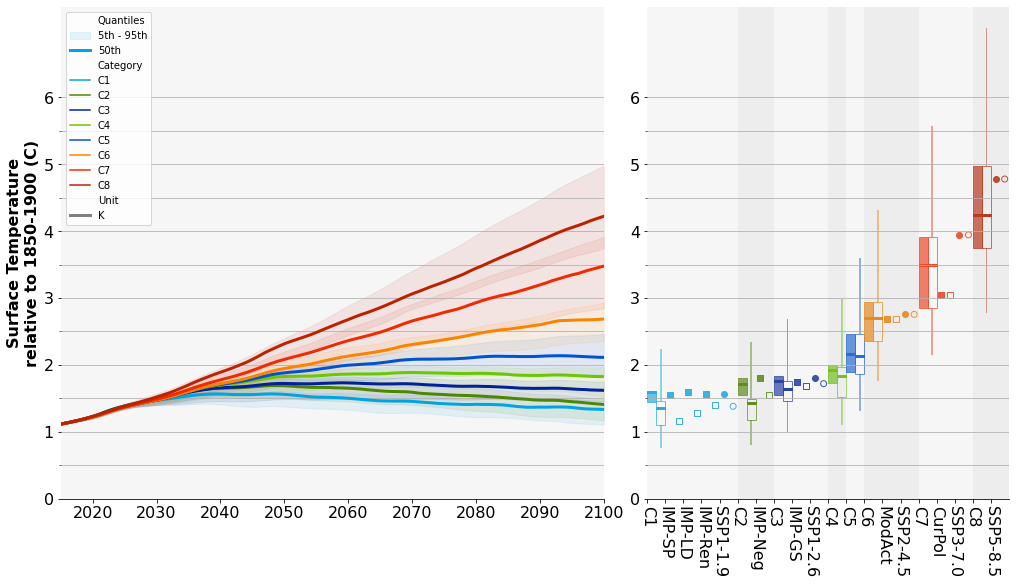

name      x                   y time_period  \
0   SSP1-1.9   4.25   1.568121078904943        peak   
1   SSP1-1.9   4.75   1.381425827069057        2100   
2   SSP1-2.6   9.25   1.801170644543945        peak   
3   SSP1-2.6   9.75   1.719843106767861        2100   
4   SSP2-4.5  14.25  2.7564334660428784        peak   
..       ...    ...                 ...         ...   
59        C8  18.75            4.222525        2100   
60        C8  18.75            3.741715        2100   
61        C8  18.75            4.980976        2100   
62        C8  18.75   2.771495212512483        2100   
63        C8  18.75  7.0407510393409485        2100   

                                          description  
0                                  Location of marker  
1                                  Location of marker  
2                                  Location of marker  
3                                  Location of marker  
4                                  Location of marker  
..                                                ...  
59                                        Median line  
60              Lower of 'box' (range over scenarios)  
61              Upper of 'box' (range over scenarios)  
62  Lower of 'line' (indicative climate plus scena...  
63  Upper of 'line' (indicative climate plus scena...  

[88 rows x 5 columns]

time                                                                                                          2015  \
Category_show_lhs model quantile region scenario unit variable                                                       
C1                model 0.05     World  scenario K    Surface Temperature (GSAT)|Lower of MAGICC and ...  1.111952   
                        0.50     World  scenario K    Surface Temperature (GSAT)|MAGICC median            1.115525   
                        0.95     World  scenario K    Surface Temperature (GSAT)|Higher of MAGICC and...  1.115594   
C2                model 0.05     World  scenario K    Surface Temperature (GSAT)|Lower of MAGICC and ...  1.111952   
                        0.50     World  scenario K    Surface Temperature (GSAT)|MAGICC median            1.115525   
                        0.95     World  scenario K    Surface Temperature (GSAT)|Higher of MAGICC and...  1.115576   
C3                model 0.05     World  scenario K    Surface Temperature (GSAT)|Lower of MAGICC and ...  1.111952   
                        0.50     World  scenario K    Surface Temperature (GSAT)|MAGICC median            1.115525   
                        0.95     World  scenario K    Surface Temperature (GSAT)|Higher of MAGICC and...  1.115570   
C4                model 0.05     World  scenario K    Surface Temperature (GSAT)|Lower of MAGICC and ...  1.111952   
                        0.50     World  scenario K    Surface Temperature (GSAT)|MAGICC median            1.115526   
                        0.95     World  scenario K    Surface Temperature (GSAT)|Higher of MAGICC and...  1.115570   
C5                model 0.05     World  scenario K    Surface Temperature (GSAT)|Lower of MAGICC and ...  1.111952   
                        0.50     World  scenario K    Surface Temperature (GSAT)|MAGICC median            1.115532   
                        0.95     World  scenario K    Surface Temperature (GSAT)|Higher of MAGICC and...  1.115570   
C6                model 0.05     World  scenario K    Surface Temperature (GSAT)|Lower of MAGICC and ...  1.111952   
                        0.50     World  scenario K    Surface Temperature (GSAT)|MAGICC median            1.115525   
                        0.95     World  scenario K    Surface Temperature (GSAT)|Higher of MAGICC and...  1.115583   
C7                model 0.05     World  scenario K    Surface Temperature (GSAT)|Lower of MAGICC and ...  1.111952   
                        0.50     World  scenario K    Surface Temperature (GSAT)|MAGICC median            1.115485   
                        0.95     World  scenario K    Surface Temperature (GSAT)|Higher of MAGICC and...  1.115588   
C8                model 0.05     World  scenario K    Surface Temperature (GSAT)|Lower of MAGICC and ...  1.111952   
                        0.50     World  scenario K    Surface Temperature (GSAT)|MAGICC median            1.115465   
                        0.95     World  scenario K    Surface Temperature (GSAT)|Higher of MAGICC and...  1.115548   

time                                                                                                          2016  \
Category_show_lhs model quantile region scenario unit variable                                                       
C1                model 0.05     World  scenario K    Surface Temperature (GSAT)|Lower of MAGICC and ...  1.131730   
                        0.50     World  scenario K    Surface Temperature (GSAT)|MAGICC median            1.133635   
                        0.95     World  scenario K    Surface Temperature (GSAT)|Higher of MAGICC and...  1.140441   
C2                model 0.05     World  scenario K    Surface Temperature (GSAT)|Lower of MAGICC and ...  1.131950   
                        0.50     World  scenario K    Surface Temperature (GSAT)|MAGICC median            1.133276   
                        0.95     World  scenario K    Surface Temperature (GSAT)|Higher of MAGICC and... 

<IPython.core.display.Javascript object>

In [35]:
fig, ax0, ax1 = get_fig_axes()

pdf, meta_pdf = get_pdf_meta_pdf(db_vetted)
### check data handling
assert pdf.meta[["model-scenario"]].drop_duplicates().drop_duplicates().shape[0] == 1202
assert meta_pdf.shape[0] == 1202

### funnels
pdfq = get_quantile_df(pdf).filter(Category_show_lhs="drop", keep=False)
ax0 = plot_funnels(pdfq, ax0)

### lines and scatter based on WG1
wg1_data = add_wg1_ssps(
    ax0, ax1, years_to_plot, bar_metas_hatches, bar_order, lhs_lines=False
)

### lines and scatter based on database output
imp_marker_data = add_lines_scatter_database_output(
    pdf,
    "IMP_marker",
    style_imps,
    years_to_plot,
    ax1,
    bar_metas_hatches,
    bar_order,
    lhs_lines=False,
)

### category ranges
cat_range_data = []
for hue_var, compare_counts in (
    ("Category_show_lhs", compare_category_counts_lhs),
    ("Category_show_rhs_only", compare_category_counts_rhs),
):
    cat_range_data_here = add_category_ranges(
        full_palette,
        pdf,
        meta_pdf,
        hue_var,
        bar_order,
        bar_metas_hatches,
        ax1,
        check_against_spm1=True,
        spm1_comparisons=table_spm1_comparisons,
        #         plot_peak_climate_uncertainty=True,
        plot_peak_climate_uncertainty=False,
        compare_category_counts=compare_counts,
    )
    cat_range_data.append(cat_range_data_here)

cat_range_data = pd.concat(cat_range_data)

### tidy up and other tweaks
ax1.set_xlim(0, len(bar_order))
ax1.set_xticks(range(len(bar_order)))
ax1.set_xticklabels([convert_imp_name(v) for v in bar_order], rotation=-90)

# ax0.legend().remove()
ax0.set_yticks(np.arange(0, 6.1, 0.1), minor=True)
ax0.set_yticks(np.arange(0, 6.1, 0.5), minor=False)
ax0.set_yticks(np.arange(0, 6.1, 0.5), minor=True)
ax0.set_yticks(np.arange(0, 6.1, 1), minor=False)
# ax0.set_ylim([1, 2])

ax0.grid(axis="y", zorder=1, which="both")
ax1.grid(axis="y", zorder=1, which="both")
ax0.set_ylabel("Surface Temperature\nrelative to 1850-1900 (C)")
ax0.set_xlabel("")

ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.spines["left"].set_visible(False)

ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
# ax1.spines["bottom"].set_visible(False)

#### background shading
ax0.axvspan(2015, 2100, facecolor="lightgray", edgecolor="none", alpha=0.2, zorder=1)

widths = (5, 2, 3, 1, 1, 3, 3, 2)
base = 0
for i, w in enumerate(widths):
    if i % 2 == 0:
        colour = "lightgray"
    else:
        colour = "darkgray"

    ax1.axvspan(base, base + w, facecolor=colour, edgecolor="none", alpha=0.2, zorder=1)
    base += w

plt.show()

rhs_data = pd.concat([wg1_data, imp_marker_data, cat_range_data])
rhs_data["name"] = rhs_data["name"].apply(convert_imp_name)
display(rhs_data)

lhs_data = pdfq.timeseries(time_axis="year").sort_index()
display(lhs_data)

lhs_data.to_csv(OUT_FILE_LHS, index=True)
rhs_data.to_csv(OUT_FILE_RHS, index=False)